In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import numpy as np

In [2]:
df = pd.read_csv("data/euvsdisinfo_full.csv")
df

,debunk_id,keywords,article_id,article_title,article_publisher,article_domain,article_url,article_text,article_language,debunk_date,published_date,class
0,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,4a8c1adf-2da5-5e66-a7e5-90c7b497e75d,Rebels without a Cause: Russia’s Proxies in Ea...,crisisweb,crisisgroup.org,https://www.crisisgroup.org/europe-central-asi...,Russia and the separatists it backs in Ukraine...,English,01-06-2022,16-07-2019,support
1,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,03c39994-cbd0-5219-a06c-a6430434bbc0,Ukraine crisis: Donetsk region asks to join Ru...,the guardian,theguardian.com,https://www.theguardian.com/world/2014/may/12/...,Request comes just two hours after referendum ...,English,01-06-2022,12-05-2014,support
2,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,78a85348-5995-5a1e-b908-ce99ef39e265,Crimea's referendum to leave Ukraine: how did ...,the guardian,theguardian.com,https://www.theguardian.com/world/2014/mar/13/...,What does the Crimean referendum mean for Ukra...,English,01-06-2022,13-03-2014,support
3,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,9ea85db2-7f64-5323-ab74-bb198bcc1736,Преса про Донбас: «Москві потрібна не капітуля...,радіо свобода,radiosvoboda.org,https://www.radiosvoboda.org/a/donbass--realii...,(Друкуємо мовою оригіналу)\nКакую цель в войне...,Russian,01-06-2022,19-10-2019,support
4,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,836dcc20-5e96-51a4-a72f-b51aa8390006,Residents Of Donbass Tell Separatists To Leave...,forbes,forbes.com,https://www.forbes.com/sites/paulroderickgrego...,The residents of occupied Donbass have suffere...,English,01-06-2022,17-06-2015,support
...,...,...,...,...,...,...,...,...,...,...,...,...
18847,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",c85ec4ae-a1c6-4e99-bf27-5d8176bcfddf,Москва осуждает возросшую военную активность Н...,sputnik,ru.armeniasputnik.am,https://ru.armeniasputnik.am/russia/20210624/2...,"ЕРЕВАН, 24 июн — Sputnik. Москва осуждает возр...",Russian,24-06-2021,24-06-2021,disinformation
18848,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",75f7ee46-d683-4c6b-ba62-c3e563cc02fa,Рябков предложил переименовать эсминец Defende...,рен тв,ren.tv,https://ren.tv/news/v-mire/849921-riabkov-pred...,Заместитель главы МИД России Сергей Рябков наз...,Russian,24-06-2021,24-06-2021,disinformation
18849,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",05a6136a-3fea-4bb4-8328-cb267951a7be,МИД осудил возросшую военную активность стран ...,ria,ria.ru,https://ria.ru/20210624/mid-1738422845.html,Сергей Рябков осудил возросшую военную активно...,Russian,24-06-2021,24-06-2021,disinformation
18850,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",3c7e53ff-61d6-4973-85c9-99ea380c76d1,МИД осудил возросшую военную активность стран ...,vzglyad,vz.ru,https://vz.ru/news/2021/6/24/1105636.html,"«Я думаю, что по дипломатическим каналам, не т...",Russian,24-06-2021,24-06-2021,disinformation


In [3]:
df["class"].value_counts()

class
disinformation    10640
support            8212
Name: count, dtype: int64

In [4]:
df["debunk_id"].nunique()

8637

In [5]:
df.groupby("debunk_id")[["class"]].value_counts().reset_index().groupby("class")["count"].min()

class
disinformation    1
support           1
Name: count, dtype: int64

In [6]:
df.groupby("debunk_id")[["class"]].value_counts().reset_index().groupby("class")["count"].max()

class
disinformation    125
support            17
Name: count, dtype: int64

In [7]:
df.groupby("debunk_id")[["class"]].value_counts().reset_index().groupby("class")["count"].mean()

class
disinformation    1.731207
support           1.864245
Name: count, dtype: float64

In [8]:
df["article_text"].str.len().mean()

6721.730797793338

In [48]:
df["keywords"].dropna().apply(lambda x: len(x.split(","))).mean()

3.8481511040170258

In [49]:
df

,debunk_id,keywords,article_id,article_title,article_publisher,article_domain,article_url,article_text,article_language,debunk_date,published_date,class,year,quarter,year_quarter
0,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,4a8c1adf-2da5-5e66-a7e5-90c7b497e75d,Rebels without a Cause: Russia’s Proxies in Ea...,crisisweb,crisisgroup.org,https://www.crisisgroup.org/europe-central-asi...,Russia and the separatists it backs in Ukraine...,English,2022-06-01,16-07-2019,support,2022,2,2022-Q2
1,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,03c39994-cbd0-5219-a06c-a6430434bbc0,Ukraine crisis: Donetsk region asks to join Ru...,the guardian,theguardian.com,https://www.theguardian.com/world/2014/may/12/...,Request comes just two hours after referendum ...,English,2022-06-01,12-05-2014,support,2022,2,2022-Q2
2,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,78a85348-5995-5a1e-b908-ce99ef39e265,Crimea's referendum to leave Ukraine: how did ...,the guardian,theguardian.com,https://www.theguardian.com/world/2014/mar/13/...,What does the Crimean referendum mean for Ukra...,English,2022-06-01,13-03-2014,support,2022,2,2022-Q2
3,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,9ea85db2-7f64-5323-ab74-bb198bcc1736,Преса про Донбас: «Москві потрібна не капітуля...,радіо свобода,radiosvoboda.org,https://www.radiosvoboda.org/a/donbass--realii...,(Друкуємо мовою оригіналу)\nКакую цель в войне...,Russian,2022-06-01,19-10-2019,support,2022,2,2022-Q2
4,bf499726-dd35-460e-87bd-f7f158525218,Nazi/Fascist,836dcc20-5e96-51a4-a72f-b51aa8390006,Residents Of Donbass Tell Separatists To Leave...,forbes,forbes.com,https://www.forbes.com/sites/paulroderickgrego...,The residents of occupied Donbass have suffere...,English,2022-06-01,17-06-2015,support,2022,2,2022-Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18847,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",c85ec4ae-a1c6-4e99-bf27-5d8176bcfddf,Москва осуждает возросшую военную активность Н...,sputnik,ru.armeniasputnik.am,https://ru.armeniasputnik.am/russia/20210624/2...,"ЕРЕВАН, 24 июн — Sputnik. Москва осуждает возр...",Russian,2021-06-24,24-06-2021,disinformation,2021,2,2021-Q2
18848,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",75f7ee46-d683-4c6b-ba62-c3e563cc02fa,Рябков предложил переименовать эсминец Defende...,рен тв,ren.tv,https://ren.tv/news/v-mire/849921-riabkov-pred...,Заместитель главы МИД России Сергей Рябков наз...,Russian,2021-06-24,24-06-2021,disinformation,2021,2,2021-Q2
18849,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",05a6136a-3fea-4bb4-8328-cb267951a7be,МИД осудил возросшую военную активность стран ...,ria,ria.ru,https://ria.ru/20210624/mid-1738422845.html,Сергей Рябков осудил возросшую военную активно...,Russian,2021-06-24,24-06-2021,disinformation,2021,2,2021-Q2
18850,0a111b26-379a-421e-8618-6727a5b677b5,"Crimea, Referendum, Manipulated elections/refe...",3c7e53ff-61d6-4973-85c9-99ea380c76d1,МИД осудил возросшую военную активность стран ...,vzglyad,vz.ru,https://vz.ru/news/2021/6/24/1105636.html,"«Я думаю, что по дипломатическим каналам, не т...",Russian,2021-06-24,24-06-2021,disinformation,2021,2,2021-Q2


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'English'),
  Text(1, 0, 'Russian'),
  Text(2, 0, 'Spanish'),
  Text(3, 0, 'Arabic'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Ukrainian'),
  Text(7, 0, 'French'),
  Text(8, 0, 'Bulgarian'),
  Text(9, 0, 'Serbian'),
  Text(10, 0, 'Georgian'),
  Text(11, 0, 'Hungarian'),
  Text(12, 0, 'Polish'),
  Text(13, 0, 'Dutch'),
  Text(14, 0, 'Azerbaijani'),
  Text(15, 0, 'Finnish'),
  Text(16, 0, 'Czech'),
  Text(17, 0, 'Macedonian'),
  Text(18, 0, 'Slovak'),
  Text(19, 0, 'Lithuanian'),
  Text(20, 0, 'Romanian'),
  Text(21, 0, 'Armenian'),
  Text(22, 0, 'Swedish'),
  Text(23, 0, 'Catalan'),
  Text(24, 0, 'Afrikaans'),
  Text(25, 0, 'Japanese'),
  Text(26, 0, 'Latvian'),
  Text(27, 0, 'Greek'),
  Text(28, 0, 'Indonesian'),
  Text(29, 0, 'Croatian'),
  

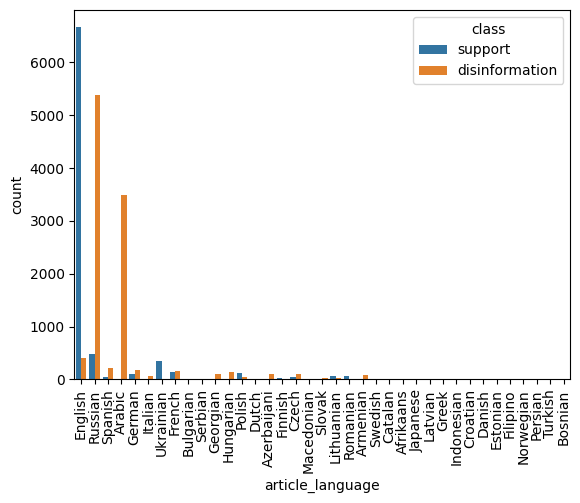

In [9]:
sns.countplot(x="article_language", data=df, hue="class")
plt.xticks(rotation=90)


In [11]:
# create a dataset with the total number of articles per language, and the distribution of classes for each language. Insert 0 if there are no articles of a certain class for a certain language
languages = df["article_language"].unique()
classes = df["class"].unique().tolist()
total_articles = []
class_distributions = []

for language in languages:
    total_articles.append(len(df[df["article_language"] == language]))
    for class_ in classes:
        class_distributions.append(
            len(df[(df["article_language"] == language) & (df["class"] == class_)])
        )

class_distributions = np.array(class_distributions).reshape(
    len(languages), len(classes)
)

distributions_df = pd.DataFrame({"total": class_distributions.sum(1), "disinformation": class_distributions[:,1], "support": class_distributions[:,0]}, index=languages
).sort_values("total", ascending=False)
distributions_df

,total,disinformation,support
English,7052,397,6655
Russian,5857,5370,487
Arabic,3492,3490,2
Ukrainian,348,7,341
French,302,166,136
German,293,187,106
Spanish,273,226,47
Polish,159,43,116
Czech,158,111,47
Hungarian,147,143,4


In [43]:
distributions_df["total"].quantile([0.25, 0.5, 0.75])

0.25      7.0
0.50     26.0
0.75    147.0
Name: total, dtype: float64

In [28]:
len(languages)

37

In [12]:
# calculate the percentage of supporting articles per language
(df[df["class"] == "support"]["article_language"].value_counts() / df["article_language"].value_counts()).sort_values(ascending=False)

article_language
Indonesian     1.000000
Estonian       1.000000
Turkish        1.000000
Norwegian      1.000000
Catalan        1.000000
Persian        1.000000
Filipino       1.000000
Danish         1.000000
Dutch          1.000000
Japanese       1.000000
Ukrainian      0.979885
English        0.943704
Romanian       0.807692
Swedish        0.782609
Finnish        0.733333
Polish         0.729560
Lithuanian     0.674157
Greek          0.600000
Afrikaans      0.555556
Bulgarian      0.538462
French         0.450331
Latvian        0.428571
German         0.361775
Croatian       0.307692
Czech          0.297468
Italian        0.197674
Spanish        0.172161
Macedonian     0.153846
Azerbaijani    0.129310
Russian        0.083148
Hungarian      0.027211
Arabic         0.000573
Armenian            NaN
Bosnian             NaN
Georgian            NaN
Serbian             NaN
Slovak              NaN
Name: count, dtype: float64

In [13]:
dates = pd.to_datetime(df["debunk_date"], format="%d-%m-%Y")
print(dates.min(),"||", dates.max())
period = relativedelta(dates.max(), dates.min())
print(period)

2015-01-06 00:00:00 || 2023-08-01 00:00:00
relativedelta(years=+8, months=+6, days=+26)


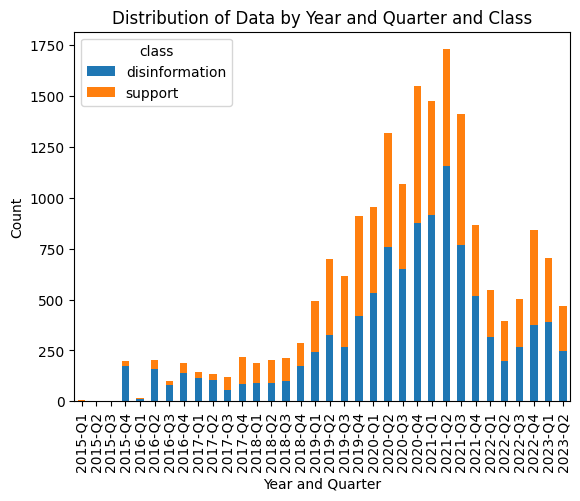

In [14]:
df["debunk_date"] = pd.to_datetime(df["debunk_date"], format="%d-%m-%Y")

# extract year and quarter from debunk_date column
df['year'] = pd.to_datetime(df['debunk_date'], format='%d-%m-%Y').dt.year
df['quarter'] = pd.to_datetime(df['debunk_date'], format='%d-%m-%Y').dt.quarter

# create a new column that combines year and quarter information
df['year_quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)

# group data by year_quarter and class, and plot stacked distribution.
grouped_df = df.groupby(['year_quarter', 'class']).size().unstack().fillna(0)

# reindex the DataFrame to include missing dates with a count of zero
all_dates = pd.date_range(start=df['debunk_date'].min(), end=df['debunk_date'].max(), freq='Q')
grouped_df = grouped_df.reindex([d.split("-")[0] + "-Q" + str(int(d.split("-")[1])//4 +1) for d in  all_dates.strftime('%Y-%m')])

grouped_df.plot(kind='bar', stacked=True)
plt.xlabel('Year and Quarter')
plt.ylabel('Count')
plt.title('Distribution of Data by Year and Quarter and Class')
plt.show()


/tmp/ipykernel_2476183/387108197.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(misinfo_df['article_publisher'], rotation=90)
/tmp/ipykernel_2476183/387108197.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(support_df['article_publisher'], rotation=90)


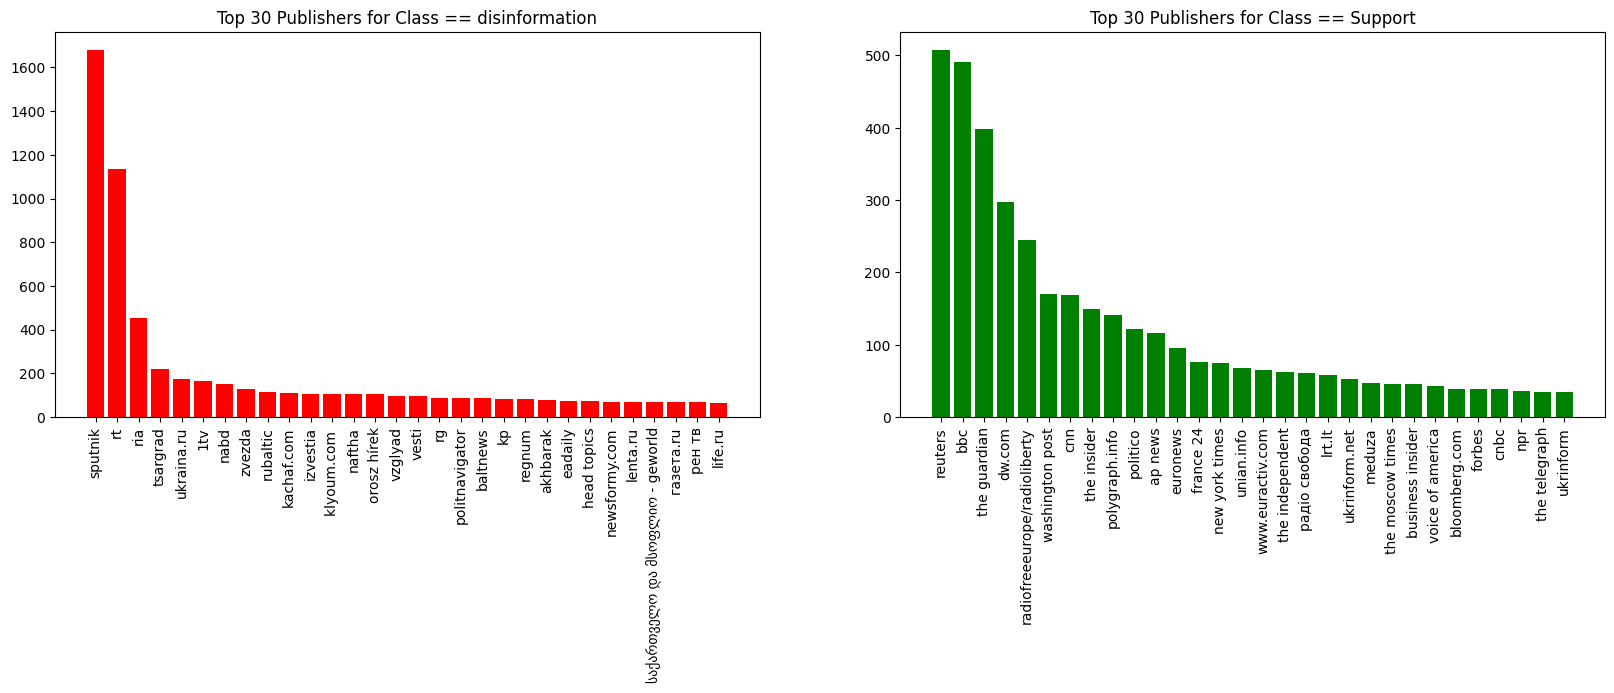

In [38]:
# Top publishers divided by class
class_counts = df.groupby(['article_publisher', 'class']).size().reset_index(name='counts')
topn = 30
# create two subplots, one for each class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# plot the top 25 publishers for class == disinformation
misinfo_df = class_counts[class_counts['class'] == 'disinformation']
misinfo_df = misinfo_df.sort_values(by='counts', ascending=False).head(topn)
ax1.bar(misinfo_df['article_publisher'], misinfo_df['counts'], color='red')
ax1.set_title(f'Top {topn} Publishers for Class == disinformation')
ax1.set_xticklabels(misinfo_df['article_publisher'], rotation=90)

# plot the top 25 publishers for class == support
support_df = class_counts[class_counts['class'] == 'support']
support_df = support_df.sort_values(by='counts', ascending=False).head(topn)
ax2.bar(support_df['article_publisher'], support_df['counts'], color='green')
ax2.set_title(f'Top {topn} Publishers for Class == Support')
ax2.set_xticklabels(support_df['article_publisher'], rotation=90)

plt.show()

In [16]:
df["article_publisher"].nunique()

3090

In [17]:
df[df["class"] == "disinformation"]["article_publisher"].nunique()

1179

In [18]:
df[df["class"] == "support"]["article_publisher"].nunique()

1911

<Axes: xlabel='keywords'>

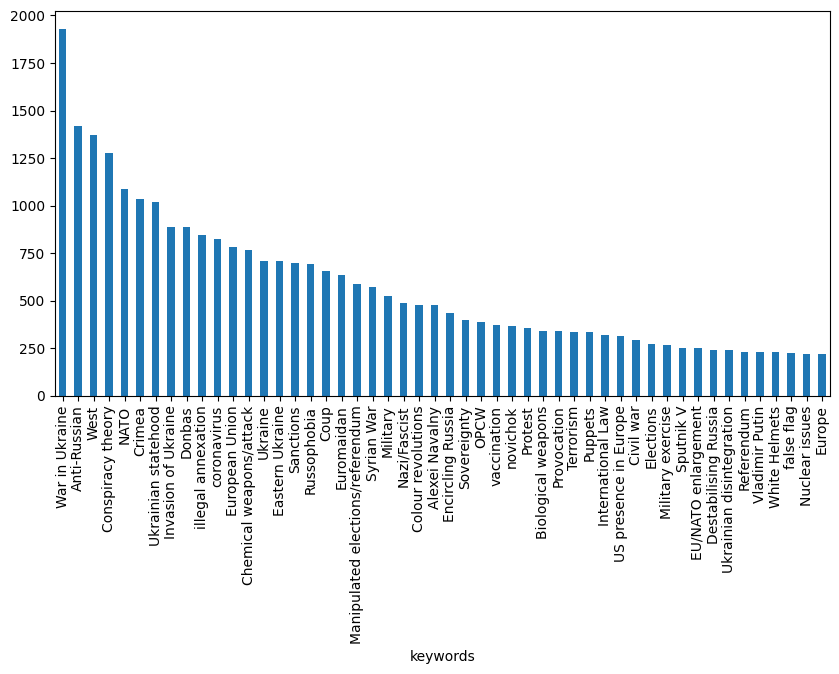

In [19]:
df_misinfo = df[df['class'] == 'disinformation']
df_misinfo["keywords"].dropna().apply(lambda x: x.split(",")).explode().str.strip().value_counts().head(50).plot(kind='bar', figsize=(10, 5))

In [20]:
top_topics = df_misinfo["keywords"].dropna().apply(lambda x: x.split(",")).explode().str.strip().value_counts().head(15)
top_publishers = df['article_language'].value_counts().head(15).index
topics_publishers = {}

for row in df_misinfo[["article_language", "keywords"]].dropna().apply(lambda x: {x["article_language"]: [k.strip() for k in x["keywords"].split(",")]}, axis=1):
    for publisher, topics in row.items():
        for topic in topics:
            if topic in top_topics:
                if topic not in topics_publishers:
                    topics_publishers[topic] = []
                else:
                    topics_publishers[topic].append(publisher)

# count the number of occurences of each publisher for each topic
topic_publisher_counts = {}
for topic, publishers in topics_publishers.items():
    topic_publisher_counts[topic] = {}
    for publisher in publishers:
        if publisher not in topic_publisher_counts[topic]:
            topic_publisher_counts[topic][publisher] = 0
        topic_publisher_counts[topic][publisher] += 1
# transform the counts into percentages
topic_publisher_percentages = {}
for topic, publisher_counts in topic_publisher_counts.items():
    total = sum(publisher_counts.values())
    topic_publisher_percentages[topic] = {publisher: count / total for publisher, count in publisher_counts.items()}
    
# keep the top 5 publishers for each topic, and aggregate the rest into a new key called "Others"
topic_publisher_percentages_top5 = {}
for topic, publisher_percentages in topic_publisher_percentages.items():
    topic_publisher_percentages_top5[topic] = {}
    top5_publishers = sorted(publisher_percentages.items(), key=lambda x: x[1], reverse=True)[:5]
    for publisher, percentage in top5_publishers:
        topic_publisher_percentages_top5[topic][publisher] = percentage
    topic_publisher_percentages_top5[topic]["Others"] = sum(publisher_percentages.values()) - sum([percentage for publisher, percentage in top5_publishers])

In [21]:
dicts = df[["article_language", "keywords"]].dropna().apply(lambda x: {x["article_language"]: [k.strip() for k in x["keywords"].split(",")]}, axis=1)
k = 10
top_keywords = df["keywords"].dropna().apply(lambda x: x.split(",")).explode().str.strip().value_counts()[:k].keys()
top_languages = df["article_language"].value_counts().head(15).keys()

counts = {}
for d in dicts:
    for lang, keywords in d.items():
        if lang in top_languages:
            if lang not in counts:
                counts[lang] = {}
            for keyword in keywords:
                if keyword in top_keywords:
                    if keyword not in counts[lang]:
                        counts[lang][keyword] = 0
                    counts[lang][keyword] += 1

(-1.25, 1.25, -1.25, 1.25)

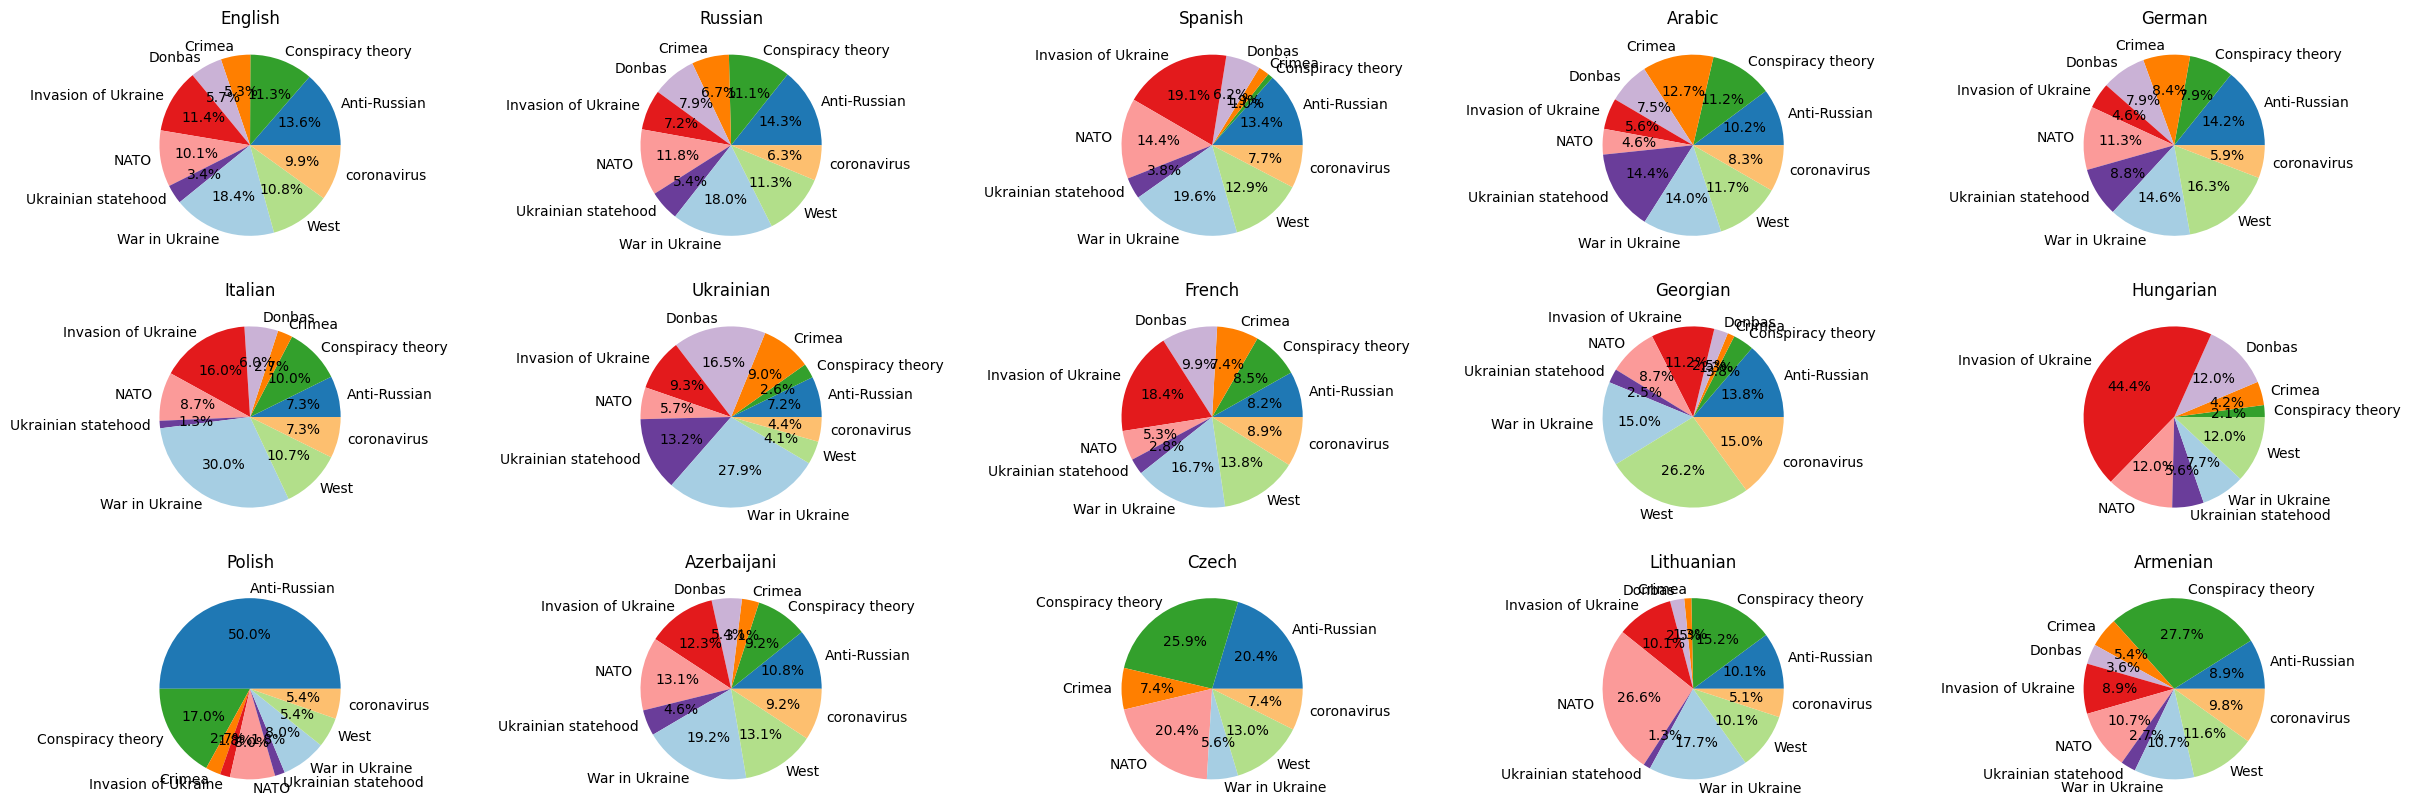

In [22]:
# plot 10 pie charts for each language. keep the colors consistent for each keyword across different charts
colors = sns.color_palette("Paired", k+1)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 10))
for i, (lang, keyword_counts) in enumerate(counts.items()):
    ax = axes[i // 5, i % 5]
    ax.set_title(lang)
    
    # sort the keyword_counts dictionary by keys
    keyword_counts = dict(sorted(keyword_counts.items()))
    
    ax.pie(keyword_counts.values(), labels=keyword_counts.keys(), autopct='%1.1f%%', colors=[colors[top_keywords.get_loc(keyword)] for keyword in keyword_counts.keys()])


axes[2,4].axis("off")

In [27]:
d = {}
top_15_languages = df["article_language"].value_counts().head(15).index.tolist()
df_top_15_languages = df[df["article_language"].isin(top_15_languages)]
d["language"] = df_top_15_languages.groupby('article_language')['keywords'].apply(lambda x: x.str.split(',').explode().str.strip().value_counts().index[0]).index.tolist()
for i in range(3):
    d[f"top{i+1}"] = df_top_15_languages.groupby('article_language')['keywords'].apply(lambda x: x.str.split(',').explode().str.strip().value_counts().index[i]).values.tolist()

pd.DataFrame(d, index = top_15_languages)

,language,top1,top2,top3
English,Arabic,Ukrainian statehood,illegal annexation,War in Ukraine
Russian,Armenian,Conspiracy theory,West,NATO
Arabic,Azerbaijani,War in Ukraine,NATO,West
Ukrainian,Czech,Migration crisis,European Union,Terrorism
French,English,War in Ukraine,Anti-Russian,Invasion of Ukraine
German,French,Invasion of Ukraine,War in Ukraine,West
Spanish,Georgian,West,War in Ukraine,European Union
Polish,German,Euromaidan,Coup,West
Czech,Hungarian,Invasion of Ukraine,European Union,Terrorism
Hungarian,Italian,War in Ukraine,Invasion of Ukraine,West
